In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('MaunaLoaDailyTemps.csv', index_col = 'DATE', parse_dates = True)

df.shape

(1825, 5)

In [3]:
df.head()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758


In [4]:
## Tp any missong data 
df = df.dropna()
df.shape

(1821, 5)

In [5]:
df

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758
...,...,...,...,...,...
2018-12-26,35.0,45.0,40.0,654,1752
2018-12-27,33.0,44.0,39.0,655,1752
2018-12-28,33.0,47.0,40.0,655,1753


<AxesSubplot:xlabel='DATE'>

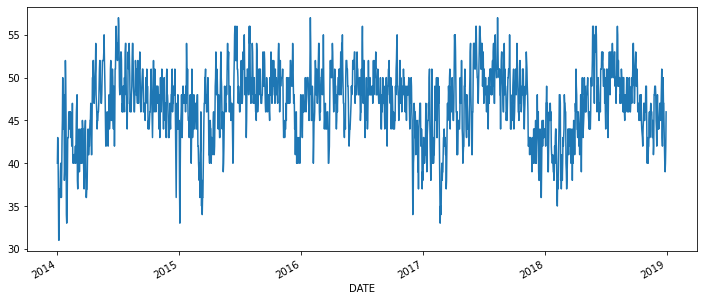

In [6]:
df['AvgTemp'].plot(figsize=(12,5))

## Check For Stationary 

In [7]:
# returns some statistical parameter

from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression amd Critical values Calculation:", dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)


In [8]:
ad_test(df['AvgTemp'])

1. ADF :  -6.554680125068782
2. P-Value :  8.675937480199415e-09
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression amd Critical values Calculation: 1808
5. Critical Values :
	 1% :  -3.433972018026501
	 5% :  -2.8631399192826676
	 10% :  -2.5676217442756872


## Figure Out Order for ARIMA Model

In [9]:
from pmdarima import auto_arima 
# for ignoring harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [10]:
stepwise_fit = auto_arima(df['AvgTemp'], trace= True, suppress_warnings= True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8344.062, Time=1.48 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10347.755, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8365.701, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9136.225, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19192.139, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8355.947, Time=0.99 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8356.308, Time=1.14 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8347.252, Time=1.66 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8317.521, Time=1.71 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8330.188, Time=1.64 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8311.911, Time=2.11 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8332.058, Time=2.17 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8317.488, Time=2.49 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8305.896, Time=2.33 sec
 ARIMA(1,0,4)(0,0,0)[0] interce

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1821
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -4139.348
Date:                Sat, 10 Jul 2021   AIC                           8294.696
Time:                        22:56:53   BIC                           8338.753
Sample:                             0   HQIC                          8310.950
                               - 1821                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.2103      0.361      3.352      0.001       0.503       1.918
ar.L1          0.9740      0.008    125.285      0.000       0.959       0.989
ma.L1         -0.1271      0.024     -5.387      0.000      -0.173      -0.081
ma.L2         -0.2225      0.024     -9.272      0.000      -0.269      -0.175
ma.L3         -0.2008      0.024     -8.427      0.000      -0.248      -0.154
ma.L4         -0.1376      0.023     -6.070      0.000      -0.182      -0.093
ma.L5         -0.0454      0.024     -1.870      0.061      -0.093       0.002
sigma2         5.4789      0.171     32.057      0.000       5.144       5.814
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                20.23
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
from statsmodels.tsa.arima_model import ARIMA

### Splitting Data into Training and Testig

In [12]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)



(1821, 5)
(1791, 5) (30, 5)


### Train the model

In [21]:
model = ARIMA(train['AvgTemp'], order=(3,1,3))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.AvgTemp   No. Observations:                 1790
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -4069.786
Method:                       css-mle   S.D. of innovations              2.350
Date:                Sat, 10 Jul 2021   AIC                           8155.573
Time:                        23:00:35   BIC                           8199.492
Sample:                             1   HQIC                          8171.790
                                                                              
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0031      0.008      0.379      0.705      -0.013       0.019
ar.L1.D.AvgTemp     1.7971      0.271      6.632      0.000       1.266       2.328
ar.L2.D.AvgTemp    -1.2937      0.293     -4.414      0.000      -1.868      -0.719
ar.L3.D.AvgTemp     0.3710      0.106      3.490      0.000       0.163       0.579
ma.L1.D.AvgTemp    -1.9472      0.272     -7.148      0.000      -2.481      -1.413
ma.L2.D.AvgTemp     1.3339      0.341      3.908      0.000       0.665       2.003
ma.L3.D.AvgTemp    -0.3686      0.130     -2.838      0.005      -0.623      -0.114
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4052           -0.0000j            1.4052           -0.0000
AR.2            1.0412           -0.9134j            1.3851           -0.1146
AR.3            1.0412           +0.9134j            1.3851            0.1146
MA.1            1.0484           -0.0000j            1.0484           -0.0000
MA.2            1.2853           -0.9673j            1.6086           -0.1027
MA.3            1.2853           +0.9673j            1.6086            0.1027
-----------------------------------------------------------------------------
"""

## Make Prediction on Test Case

In [22]:
start = len(train)
end = len(train) + len(test) - 1
pred = model.predict(start=start,end=end,typ='levels')
print(pred)


1790    44.839360
1791    45.129265
1792    45.543326
1793    45.853174
1794    45.982246
1795    45.967331
1796    45.888869
1797    45.815428
1798    45.779811
1799    45.782094
1800    45.805421
1801    45.831561
1802    45.849591
1803    45.857216
1804    45.857676
1805    45.855712
1806    45.854803
1807    45.856268
1808    45.859733
1809    45.864116
1810    45.868438
1811    45.872208
1812    45.875403
1813    45.878257
1814    45.881038
1815    45.883915
1816    45.886933
1817    45.890051
1818    45.893206
1819    45.896346
dtype: float64


In [23]:
## Replacing indexes with dates
pred.index=df.index[start:end+1]
print(pred)

DATE
2018-12-01    44.839360
2018-12-02    45.129265
2018-12-03    45.543326
2018-12-04    45.853174
2018-12-05    45.982246
2018-12-06    45.967331
2018-12-07    45.888869
2018-12-08    45.815428
2018-12-09    45.779811
2018-12-10    45.782094
2018-12-11    45.805421
2018-12-12    45.831561
2018-12-13    45.849591
2018-12-14    45.857216
2018-12-15    45.857676
2018-12-16    45.855712
2018-12-17    45.854803
2018-12-18    45.856268
2018-12-19    45.859733
2018-12-20    45.864116
2018-12-21    45.868438
2018-12-22    45.872208
2018-12-23    45.875403
2018-12-24    45.878257
2018-12-25    45.881038
2018-12-26    45.883915
2018-12-27    45.886933
2018-12-28    45.890051
2018-12-29    45.893206
2018-12-30    45.896346
dtype: float64


<AxesSubplot:xlabel='DATE'>

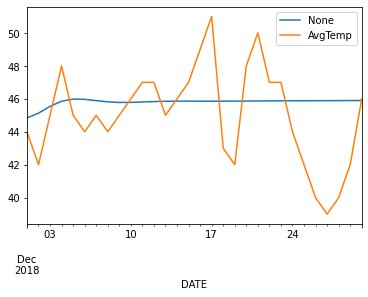

In [24]:
pred.plot(legend = True)
test['AvgTemp'].plot(legend=True)

In [25]:
test['AvgTemp'].mean()

45.0

In [26]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['AvgTemp'].mean()
rmse=sqrt(mean_squared_error(pred,test['AvgTemp']))
print(rmse)

2.9659279666840774


In [27]:
model2 =ARIMA(df['AvgTemp'],order=(3,1,3))
model2=model2.fit()
df.tail()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2018-12-26,35.0,45.0,40.0,654,1752
2018-12-27,33.0,44.0,39.0,655,1752
2018-12-28,33.0,47.0,40.0,655,1753
2018-12-29,36.0,47.0,42.0,655,1753
2018-12-30,39.0,52.0,46.0,656,1754


### Future Dates 

In [28]:
index_future_dates=pd.date_range(start='2018-12-30',end='2019-01-29')
#print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2018-12-30    46.310402
2018-12-31    45.934576
2019-01-01    45.375702
2019-01-02    44.965744
2019-01-03    44.807969
2019-01-04    44.846131
2019-01-05    44.967785
2019-01-06    45.080442
2019-01-07    45.141365
2019-01-08    45.151222
2019-01-09    45.132261
2019-01-10    45.108053
2019-01-11    45.092721
2019-01-12    45.089566
2019-01-13    45.095025
2019-01-14    45.103604
2019-01-15    45.111196
2019-01-16    45.116156
2019-01-17    45.118784
2019-01-18    45.120232
2019-01-19    45.121586
2019-01-20    45.123434
2019-01-21    45.125860
2019-01-22    45.128658
2019-01-23    45.131564
2019-01-24    45.134399
2019-01-25    45.137104
2019-01-26    45.139704
2019-01-27    45.142257
2019-01-28    45.144813
2019-01-29    45.147395
Freq: D, Name: ARIMA Predictions, dtype: float64


<AxesSubplot:>

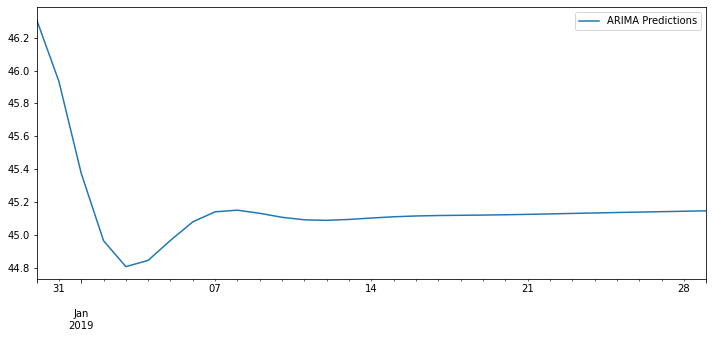

In [29]:
pred.plot(figsize=(12,5),legend=True)
